# How to Import native Python modules in Databricks?
## Solution
1. Place your code in path accessible to the driver, e.g. 
  - "/databricks/driver/"
  - "/dbfs/mnt/<path_to_s3_mounted-bucket>"
2. Import sys package
3. Append path your code (including subfolders and possibly files)
4. Import functions from your modules as usual in Python

### Caveats:
1. You might need to re-attach notebook to clean cache
2. Code will be only accessible to **DRIVER**. 
3. If you want your functions accessible to workers, build a Python EGG and install it as either Library or Init-Script

In [2]:
%sh
pwd

/databricks/driver

In [3]:
%sh
git clone https://github.com/javierorozco/databricks_import_python_module.git

Cloning into 'databricks_import_python_module'...

In [4]:
%sh
ls -alh /databricks/driver/databricks_import_python_module/

total 24K
drwxr-xr-x 3 root root 4.0K Jul 18 21:45 .
drwxr-xr-x 1 root root 4.0K Jul 18 21:45 ..
drwxr-xr-x 8 root root 4.0K Jul 18 21:45 .git
-rw-r--r-- 1 root root 7 Jul 18 21:45 .gitignore
-rw-r--r-- 1 root root 108 Jul 18 21:45 README.md
-rw-r--r-- 1 root root 879 Jul 18 21:45 test.py

In [5]:
import sys

# Add the path to system, local or mounted S3 bucket, e.g. /dbfs/mnt/<path_to_bucket>
sys.path.append('/databricks/driver/')
sys.path.append('/databricks/driver/databricks_import_python_module/')
sys.path.append('/databricks/driver/databricks_import_python_module/test.py')

In [6]:
from databricks_import_python_module.test import create_data, create_plot

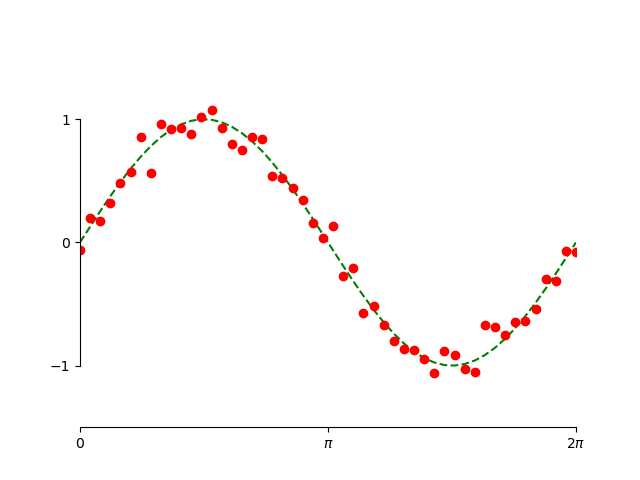

In [7]:
x, y, y2 = create_data()
fig = create_plot(x, y, y2)
display(fig)